In [71]:
import tensorflow as tf
import numpy as np
import keras
import matplotlib.pyplot as plt
from PIL import Image
from keras.datasets import cifar10

from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Read in images

In [14]:
IMG_HEIGHT = IMG_WIDTH = 32
BATCH_SIZE = 32


np.random.seed(42)
tf.random.set_seed(42)
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [15]:
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation images shape:", test_images.shape)
print("Validation labels shape:", test_labels.shape)

Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 1)
Validation images shape: (10000, 32, 32, 3)
Validation labels shape: (10000, 1)


# Image Visualization

In [5]:
data_dict = {0 : "Airplane",
             1 : "Car",
             2 : "Bird",
             3 : "Cat",
             4 : "Deer",
             5 : "Dog",
             6 : "Frog",
             7 : "Horse",
             8 : "Ship",
             9 : "Truck",
            }

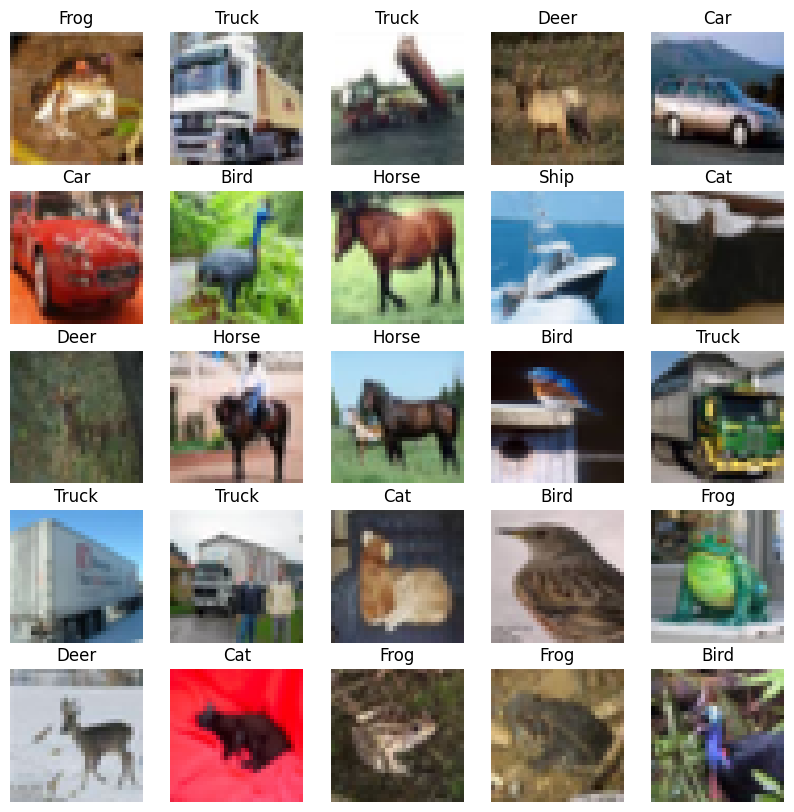

In [6]:
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i].astype('uint8'))
    plt.title(data_dict[int(train_labels[i])])
    plt.axis("off")

# Preprocessing

## Normalization

In [16]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [61]:
opt = Adam(learning_rate=1e-7)
EPOCHS = 25

In [102]:
def acc_loss_graph(train_acc, train_loss, val_acc, val_loss):
  epochs_range = range(len(train_acc))

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, train_acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, train_loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

# NN

In [58]:
model = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.1),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.1),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])

In [59]:
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 3072)              0         
                                                                 
 dense_18 (Dense)            (None, 512)               1573376   
                                                                 
 dropout_18 (Dropout)        (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 256)               131328    
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               32896     
                                                                 
 dropout_20 (Dropout)        (None, 128)              

In [62]:
history = model.fit(train_images, 
                    train_labels, 
                    epochs=EPOCHS, 
                    validation_data=(test_images, test_labels))

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
Exception ignored in: <function _xla_gc_callback at 0x7f4a39b624d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


1563/1563 [==============================] - 67s 6ms/step - loss: 3.7478 - accuracy: 0.1057 - val_loss: 3.7010 - val_accuracy: 0.1226
Epoch 2/25
1563/1563 [==============================] - 8s 5ms/step - loss: 3.7028 - accuracy: 0.1227 - val_loss: 3.6759 - val_accuracy: 0.1588
Epoch 3/25
1563/1563 [==============================] - 7s 4ms/step - loss: 3.6831 - accuracy: 0.1335 - val_loss: 3.6582 - val_accuracy: 0.1588
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 3.6674 - accuracy: 0.1424 - val_loss: 3.6418 - val_accuracy: 0.1641
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 3.6521 - accuracy: 0.1489 - val_loss: 3.6264 - val_accuracy: 0.1737
Epoch 6/25
1563/1563 [==============================] - 10s 6ms/step - loss: 3.6382 - accuracy: 0.1572 - val_loss: 3.6121 - val_accuracy: 0.1846
Epoch 7/25
1563/1563 [==============================] - 11s 7ms/step - loss: 3.6270 - accuracy: 0.1638 - val_loss: 3.5987 - val_accuracy: 0.1966


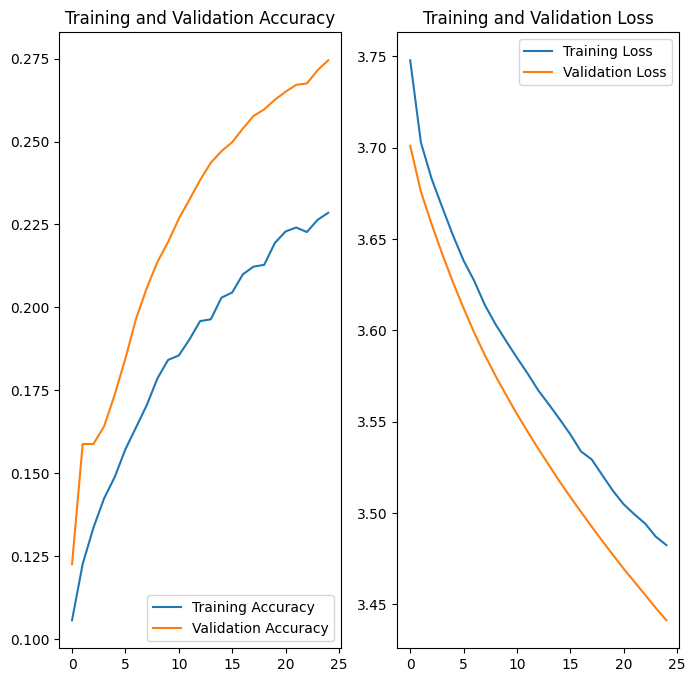

In [103]:
acc_loss_graph(history.history['accuracy'], 
               history.history['loss'], 
               history.history['val_accuracy'], 
               history.history['val_loss'])

# CNN

In [40]:
model_cnn = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')       
])

In [41]:
model_cnn.compile(optimizer=opt,
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])

In [42]:
model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 1024)             

In [43]:
history_cnn = model.fit(train_images, 
                    train_labels, 
                    epochs=EPOCHS, 
                    validation_data=(test_images, test_labels),
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7927 - accuracy: 0.3835 - val_loss: 1.7497 - val_accuracy: 0.3983
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7902 - accuracy: 0.3847 - val_loss: 1.7187 - val_accuracy: 0.4133
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7936 - accuracy: 0.3848 - val_loss: 1.7189 - val_accuracy: 0.4220
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7905 - accuracy: 0.3850 - val_loss: 1.7431 - val_accuracy: 0.4139


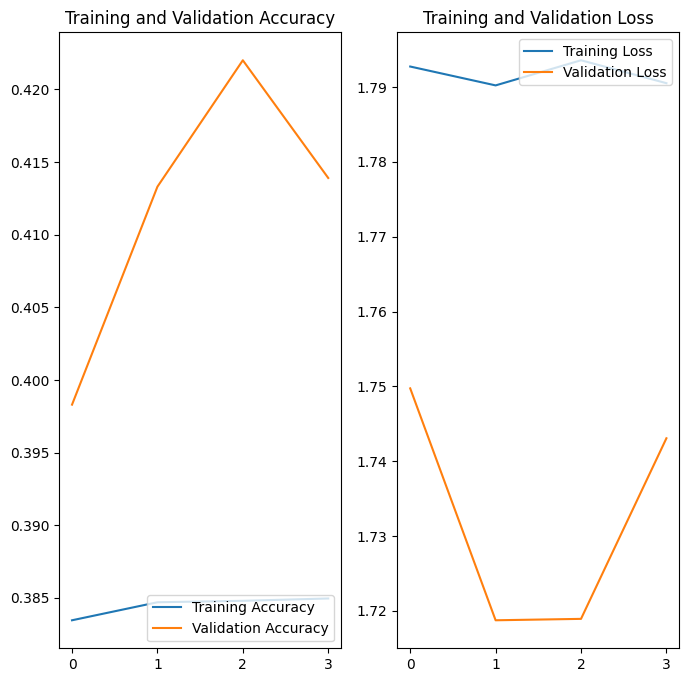

In [104]:
acc_loss_graph(history_cnn.history['accuracy'], 
               history_cnn.history['loss'], 
               history_cnn.history['val_accuracy'], 
               history_cnn.history['val_loss'])

# Data Augmentation

In [45]:
# Data agumentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(train_images)

In [46]:
model_cnn_aug = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')       
])

In [53]:
opt = Adam(learning_rate=1e-7)
model_cnn_aug.compile(optimizer=opt,
                      loss=tf.keras.losses.CategoricalCrossentropy(),
                      metrics=['accuracy'])

In [54]:
model_cnn_aug.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 1024)             

In [55]:
history_cnn_aug = model_cnn_aug.fit(train_images, 
                                    train_labels, 
                                    epochs=EPOCHS, 
                                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7900 - accuracy: 0.3845 - val_loss: 1.7059 - val_accuracy: 0.4305
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7890 - accuracy: 0.3848 - val_loss: 1.7323 - val_accuracy: 0.4024
Epoch 3/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7875 - accuracy: 0.3882 - val_loss: 1.7390 - val_accuracy: 0.4136
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7846 - accuracy: 0.3867 - val_loss: 1.7268 - val_accuracy: 0.4197
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7900 - accuracy: 0.3852 - val_loss: 1.7039 - val_accuracy: 0.4269
Epoch 6/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.7783 - accuracy: 0.3904 - val_loss: 1.7159 - val_accuracy: 0.4167
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7804 - accuracy: 0.3904 - val_loss: 1.7496 - val_accuracy:

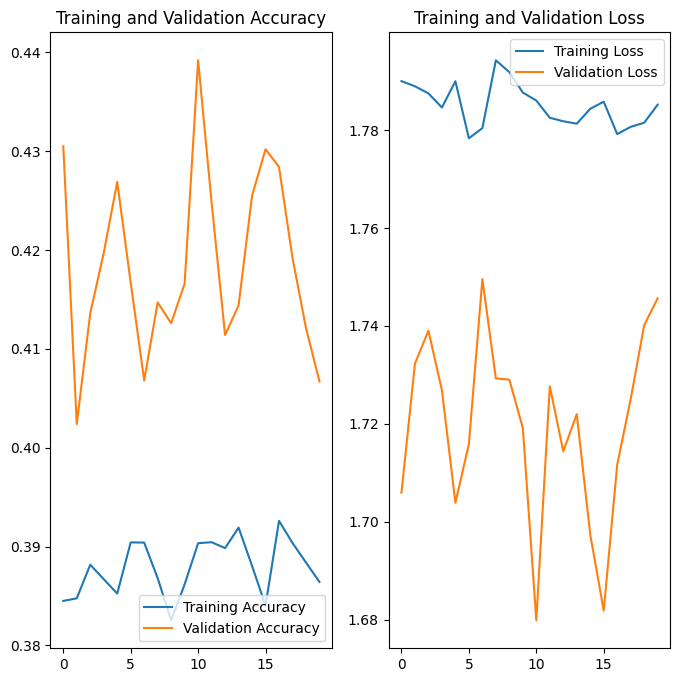

In [105]:
acc_loss_graph(history_cnn_aug.history['accuracy'], 
               history_cnn_aug.history['loss'], 
               history_cnn_aug.history['val_accuracy'], 
               history_cnn_aug.history['val_loss'])

# Pre-trained Models

## VGG16

In [75]:
from tensorflow.keras.applications.vgg16 import VGG16

base_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [76]:
base_vgg.trainable = False

new_vgg = Sequential([
    base_vgg,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [85]:
new_vgg.compile(optimizer=Adam(learning_rate=1e-6),
                      loss=tf.keras.losses.CategoricalCrossentropy(),
                      metrics=['accuracy'])

In [86]:
new_vgg.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_24 (Dense)            (None, 256)               131328    
                                                                 
 dense_25 (Dense)            (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________


In [87]:
train_labels_categorical = to_categorical(train_labels, num_classes=10)
test_labels_categorical = to_categorical(test_labels, num_classes=10)

In [88]:
vgg_history = new_vgg.fit(train_images, 
                          train_labels_categorical, 
                          epochs=EPOCHS, 
                          batch_size=32,
                          validation_data=(test_images, test_labels_categorical))

Epoch 1/25
1563/1563 [==============================] - 71s 11ms/step - loss: 2.3829 - accuracy: 0.1144 - val_loss: 2.3352 - val_accuracy: 0.1274
Epoch 2/25
1563/1563 [==============================] - 17s 11ms/step - loss: 2.2987 - accuracy: 0.1400 - val_loss: 2.2717 - val_accuracy: 0.1545
Epoch 3/25
1563/1563 [==============================] - 17s 11ms/step - loss: 2.2445 - accuracy: 0.1728 - val_loss: 2.2253 - val_accuracy: 0.1934
Epoch 4/25
1563/1563 [==============================] - 17s 11ms/step - loss: 2.2022 - accuracy: 0.2108 - val_loss: 2.1867 - val_accuracy: 0.2241
Epoch 5/25
1563/1563 [==============================] - 18s 11ms/step - loss: 2.1652 - accuracy: 0.2446 - val_loss: 2.1517 - val_accuracy: 0.2480
Epoch 6/25
1563/1563 [==============================] - 18s 12ms/step - loss: 2.1310 - accuracy: 0.2698 - val_loss: 2.1190 - val_accuracy: 0.2746
Epoch 7/25
1563/1563 [==============================] - 17s 11ms/step - loss: 2.0989 - accuracy: 0.2898 - val_loss: 2.0880 -

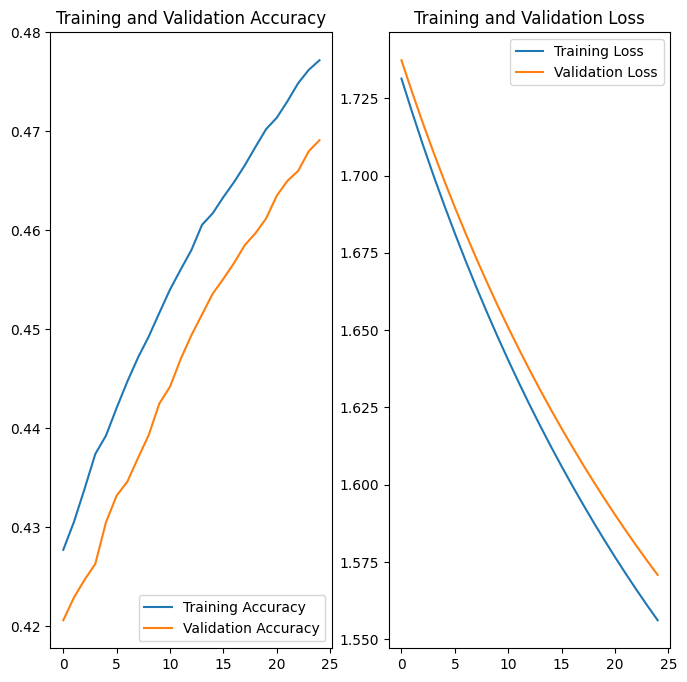

In [106]:
acc_loss_graph(vgg_history.history['accuracy'], 
               vgg_history.history['loss'], 
               vgg_history.history['val_accuracy'], 
               vgg_history.history['val_loss'])

### Fine Tuning

In [109]:
base_vgg.trainable = True
print("Number of layers in the base model: ", len(base_vgg.layers))

Number of layers in the base model:  19


In [111]:
fine_tune_at = 10
for layer in base_vgg.layers[:fine_tune_at]:
  layer.trainable = False

In [113]:
fine_tune_vgg = Sequential([
    base_vgg,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [117]:
fine_tune_vgg.compile(optimizer=Adam(learning_rate=1e-6),
                      loss=tf.keras.losses.CategoricalCrossentropy(),
                      metrics=['accuracy'])

In [115]:
fine_tune_vgg.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d_3   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_28 (Dense)            (None, 256)               131328    
                                                                 
 dense_29 (Dense)            (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 13,113,098
Non-trainable params: 1,735,488
_________________________________________________________________


In [116]:
history_fine_tune_vgg = fine_tune_vgg.fit(train_images, 
                                train_labels_categorical, 
                                epochs=EPOCHS, 
                                batch_size=32,
                                validation_data=(test_images, test_labels_categorical))

Epoch 1/25
1563/1563 [==============================] - 43s 24ms/step - loss: 1.6333 - accuracy: 0.4368 - val_loss: 1.1781 - val_accuracy: 0.5943
Epoch 2/25
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0400 - accuracy: 0.6414 - val_loss: 0.9780 - val_accuracy: 0.6628
Epoch 3/25
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9058 - accuracy: 0.6862 - val_loss: 0.9086 - val_accuracy: 0.6848
Epoch 4/25
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8353 - accuracy: 0.7108 - val_loss: 0.8553 - val_accuracy: 0.7041
Epoch 5/25
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7854 - accuracy: 0.7271 - val_loss: 0.8234 - val_accuracy: 0.7149
Epoch 6/25
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7468 - accuracy: 0.7406 - val_loss: 0.7966 - val_accuracy: 0.7241
Epoch 7/25
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7141 - accuracy: 0.7510 - val_loss: 0.7664 -

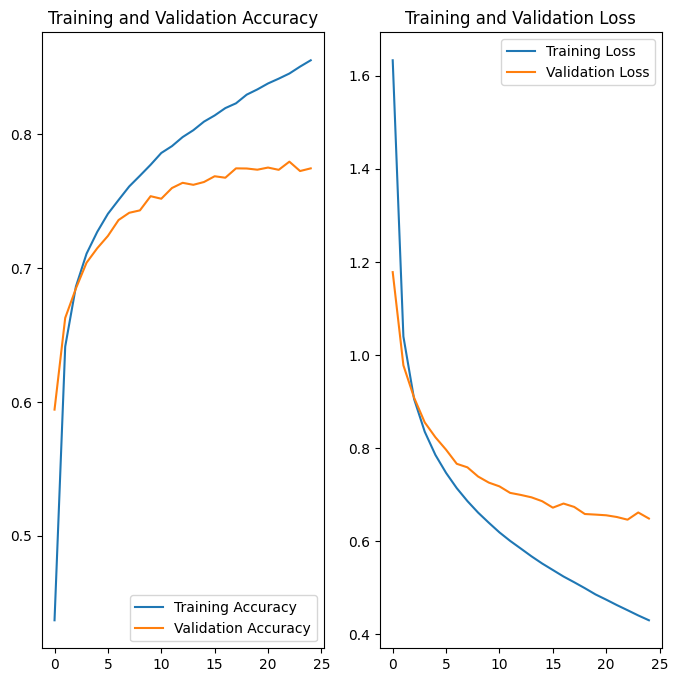

In [118]:
acc_loss_graph(history_fine_tune_vgg.history['accuracy'], 
               history_fine_tune_vgg.history['loss'], 
               history_fine_tune_vgg.history['val_accuracy'], 
               history_fine_tune_vgg.history['val_loss'])

## ResNet-50

In [96]:
from tensorflow.keras.applications.resnet50 import ResNet50

base_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

94765736/94765736 [==============================] - 3s 0us/step


In [97]:
base_resnet.trainable = False

new_resnet = Sequential([
    base_resnet,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [98]:
new_resnet.compile(optimizer=Adam(learning_rate=1e-6),
                    loss=tf.keras.losses.CategoricalCrossentropy(),
                    metrics=['accuracy'])

In [99]:
new_resnet.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_26 (Dense)            (None, 256)               524544    
                                                                 
 dense_27 (Dense)            (None, 10)                2570      
                                                                 
Total params: 24,114,826
Trainable params: 527,114
Non-trainable params: 23,587,712
_________________________________________________________________


In [107]:
history_resnet = new_resnet.fit(train_images, 
                                train_labels_categorical, 
                                epochs=EPOCHS, 
                                batch_size=32,
                                validation_data=(test_images, test_labels_categorical))

Epoch 1/25
1563/1563 [==============================] - 78s 15ms/step - loss: 2.8285 - accuracy: 0.1181 - val_loss: 2.3582 - val_accuracy: 0.1248
Epoch 2/25
1563/1563 [==============================] - 23s 15ms/step - loss: 2.3204 - accuracy: 0.1152 - val_loss: 2.3096 - val_accuracy: 0.1135
Epoch 3/25
1563/1563 [==============================] - 24s 15ms/step - loss: 2.3036 - accuracy: 0.1238 - val_loss: 2.2988 - val_accuracy: 0.1313
Epoch 4/25
1563/1563 [==============================] - 24s 16ms/step - loss: 2.2928 - accuracy: 0.1431 - val_loss: 2.2870 - val_accuracy: 0.1523
Epoch 5/25
1563/1563 [==============================] - 23s 14ms/step - loss: 2.2821 - accuracy: 0.1564 - val_loss: 2.2766 - val_accuracy: 0.1620
Epoch 6/25
1563/1563 [==============================] - 25s 16ms/step - loss: 2.2729 - accuracy: 0.1677 - val_loss: 2.2674 - val_accuracy: 0.1672
Epoch 7/25
1563/1563 [==============================] - 23s 14ms/step - loss: 2.2643 - accuracy: 0.1769 - val_loss: 2.2588 -

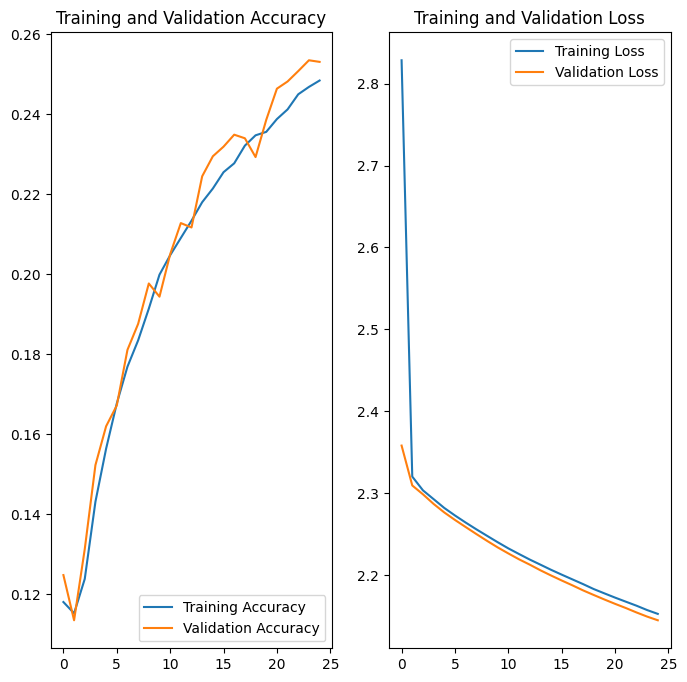

In [108]:
acc_loss_graph(history_resnet.history['accuracy'], 
               history_resnet.history['loss'], 
               history_resnet.history['val_accuracy'], 
               history_resnet.history['val_loss'])